In [ ]:
import gymnasium as gym
import mo_gymnasium as mo_gym
import numpy as np
from src import MO_DQN, MO_DQN_SEP
from src.utils import ChebyshevScalarisation
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd
import torch

### Linear Scalarisation

In [3]:
env = mo_gym.make('mo-highway-env-v0', render_mode='rgb_array')
env.unwrapped.configure({
    "screen_width": 500,
    "screen_height": 500,
    "observation": {
        "type": "MultiAgentObservation",
        "observation_config": {
            "type": "Kinematics",
            "see_behind": False
        }
    }
})

obs, info = env.reset()

linear_agent = MO_DQN.MO_DQN(env, num_objectives=2, seed=11, observation_space_shape=obs[0].shape, replay_buffer_size=200, batch_ratio=0.3,
                      objective_names=["speed_reward", "energy_reward"])
linear_agent.train(50_000, epsilon_start=0.9, epsilon_end=0.0, inv_optimisation_frequency=1)

df = linear_agent.evaluate(num_repetitions= 20, hv_reference_point=np.ndarray([0,0]), seed=11, episode_recording_interval=None)
print(df)
df.to_csv("data/linear_scalarisation_eval.csv")

Training iterations:   2%|▏         | 1245/50000 [00:32<21:30, 37.77it/s]


KeyboardInterrupt: 

### Chebyshev Scalarisation

In [2]:
env = mo_gym.make('mo-circle-env-v0', render_mode='rgb_array')
env.unwrapped.configure({
    "screen_width": 500,
    "screen_height": 500,
    "observation": {
        "type": "MultiAgentObservation",
        "observation_config": {
            "type": "Kinematics",
        }
    }
})

obs, info = env.reset()
scal_arguments = [torch.tensor([-float("inf"),-float("inf")]), 0.1] #initial utopian and threshold value
cheb_agent = MO_DQN.MO_DQN(env, num_objectives=2, seed=11, observation_space_shape=obs[0].shape, replay_buffer_size=1000, batch_ratio=0.2,
                      objective_names=["speed_reward", "energy_reward"], scalarisation_method=ChebyshevScalarisation, scalarisation_argument_list=scal_arguments)
cheb_agent.train(1000, epsilon_start=0.1, epsilon_end=0.1, inv_optimisation_frequency=1)

df = cheb_agent.evaluate(num_repetitions= 20, hv_reference_point=np.ndarray([0,0]), seed=11, episode_recording_interval=100)
print(df)
df.to_csv("data/chebyshev_scalarisation_eval.csv")

Weight tuple: 100%|██████████| 66/66 [19:36<00:00, 17.82s/it]

      repetition_number  weight_index weight_tuple  num_iterations  \
0                     0             0   [0.0, 1.0]              10   
1                     1             0   [0.0, 1.0]               7   
2                     2             0   [0.0, 1.0]              21   
3                     3             0   [0.0, 1.0]               9   
4                     4             0   [0.0, 1.0]               5   
...                 ...           ...          ...             ...   
1315                 15            65   [1.0, 0.0]              56   
1316                 16            65   [1.0, 0.0]             100   
1317                 17            65   [1.0, 0.0]             100   
1318                 18            65   [1.0, 0.0]              25   
1319                 19            65   [1.0, 0.0]              28   

      normalised_speed_reward  normalised_energy_reward  raw_speed_reward  \
0                    0.875000                  0.456762              8.75   
1    

In [3]:
df = linear_agent.evaluate(num_repetitions= 5, hv_reference_point=np.ndarray([0,0]), seed=11, episode_recording_interval=None, num_points=3)
print(df)
df.to_csv("data/linear_scalarisation_eval.csv")

Weight tuple: 100%|██████████| 3/3 [02:46<00:00, 55.62s/it]

    repetition_number  weight_index                              weight_tuple  \
0                   0             0                                [0.0, 1.0]   
1                   1             0                                [0.0, 1.0]   
2                   2             0                                [0.0, 1.0]   
3                   3             0                                [0.0, 1.0]   
4                   4             0                                [0.0, 1.0]   
5                   0             1  [0.5008272196935588, 0.4991727803064413]   
6                   1             1  [0.5008272196935588, 0.4991727803064413]   
7                   2             1  [0.5008272196935588, 0.4991727803064413]   
8                   3             1  [0.5008272196935588, 0.4991727803064413]   
9                   4             1  [0.5008272196935588, 0.4991727803064413]   
10                  0             2                                [1.0, 0.0]   
11                  1       

In [9]:
df = cheb_agent.evaluate(num_repetitions= 20, hv_reference_point=np.ndarray([0,0]), seed=11, episode_recording_interval=100)
print(df)
df.to_csv("data/chebyshev_scalarisation_eval.csv")

/home/franz/Documents/Master_Project/moma-rl-ad/venv/lib/python3.12/site-packages/gymnasium/experimental/wrappers/rendering.py:166: UserWarning: WARN: Overwriting existing videos at /home/franz/Documents/Master_Project/moma-rl-ad/videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
Weight tuple:   0%|          | 0/66 [00:02<?, ?it/s]

Moviepy - Building video /home/franz/Documents/Master_Project/moma-rl-ad/videos/training_MODQN-episode-0.mp4.
Moviepy - Writing video /home/franz/Documents/Master_Project/moma-rl-ad/videos/training_MODQN-episode-0.mp4



Weight tuple:   0%|          | 0/66 [00:03<?, ?it/s]

Moviepy - Done !
Moviepy - video ready /home/franz/Documents/Master_Project/moma-rl-ad/videos/training_MODQN-episode-0.mp4


Weight tuple:   8%|▊         | 5/66 [00:50<09:40,  9.51s/it]

Moviepy - Building video /home/franz/Documents/Master_Project/moma-rl-ad/videos/training_MODQN-episode-100.mp4.
Moviepy - Writing video /home/franz/Documents/Master_Project/moma-rl-ad/videos/training_MODQN-episode-100.mp4



Weight tuple:   8%|▊         | 5/66 [00:50<09:40,  9.51s/it]

Moviepy - Done !
Moviepy - video ready /home/franz/Documents/Master_Project/moma-rl-ad/videos/training_MODQN-episode-100.mp4


Weight tuple:  15%|█▌        | 10/66 [01:35<08:17,  8.88s/it]

Moviepy - Building video /home/franz/Documents/Master_Project/moma-rl-ad/videos/training_MODQN-episode-200.mp4.
Moviepy - Writing video /home/franz/Documents/Master_Project/moma-rl-ad/videos/training_MODQN-episode-200.mp4



Weight tuple:  15%|█▌        | 10/66 [01:35<08:17,  8.88s/it]

Moviepy - Done !
Moviepy - video ready /home/franz/Documents/Master_Project/moma-rl-ad/videos/training_MODQN-episode-200.mp4


Weight tuple:  17%|█▋        | 11/66 [01:45<08:46,  9.58s/it]


KeyboardInterrupt: 

## Visualisation

In [3]:
df_linear = pd.read_csv("data/linear_scalarisation_eval.csv")
df_cheb = pd.read_csv("data/chebyshev_scalarisation_eval.csv")
display(df_linear.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1320 non-null   int64  
 1   repetition_number         1320 non-null   int64  
 2   weight_index              1320 non-null   int64  
 3   weight_tuple              1320 non-null   object 
 4   num_iterations            1320 non-null   int64  
 5   normalised_speed_reward   1320 non-null   float64
 6   normalised_energy_reward  1320 non-null   float64
 7   raw_speed_reward          1320 non-null   float64
 8   raw_energy_reward         1320 non-null   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 92.9+ KB


None

In [4]:
grouped_df_linear = df_linear.groupby("weight_index")[["normalised_speed_reward","normalised_energy_reward"]].mean()
grouped_df_cheb = df_cheb.groupby("weight_index")[["normalised_speed_reward","normalised_energy_reward"]].mean()

<Axes: xlabel='normalised_speed_reward', ylabel='normalised_energy_reward'>

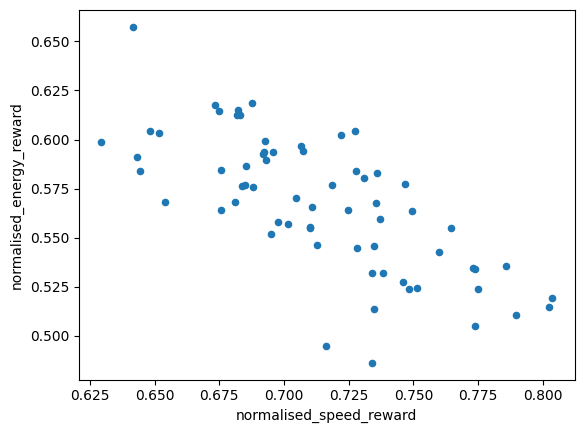

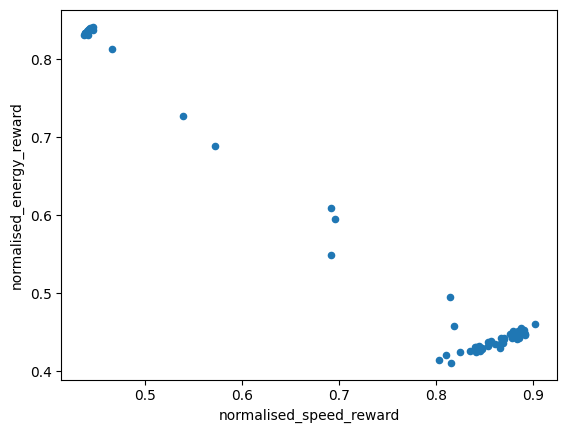

In [5]:
grouped_df_linear.plot.scatter(x="normalised_speed_reward",y="normalised_energy_reward")
grouped_df_cheb.plot.scatter(x="normalised_speed_reward",y="normalised_energy_reward")

array([[<Axes: title={'center': 'num_iterations'}>]], dtype=object)

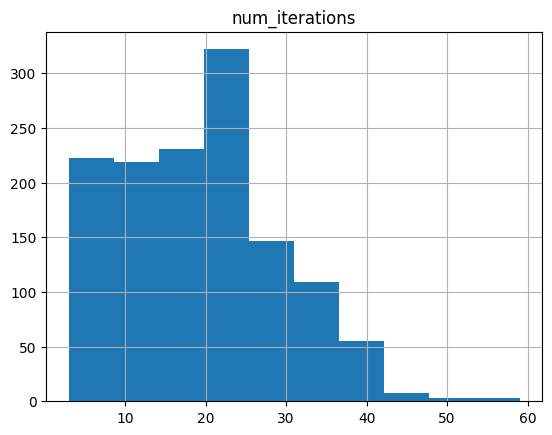

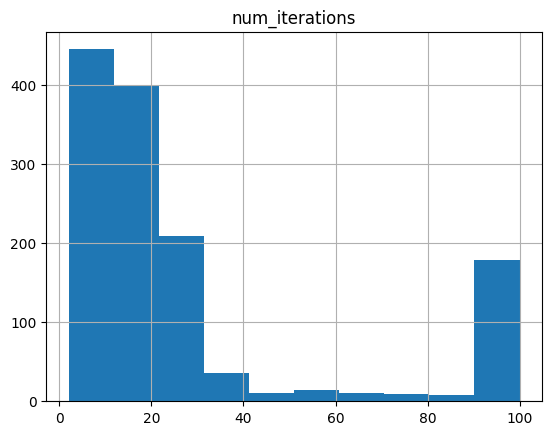

In [8]:
df_linear.hist("num_iterations")
df_cheb.hist("num_iterations")

<Axes: xlabel='normalised_speed_reward', ylabel='normalised_energy_reward'>

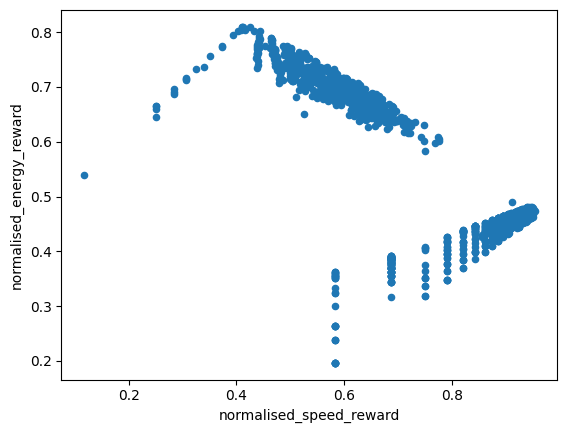

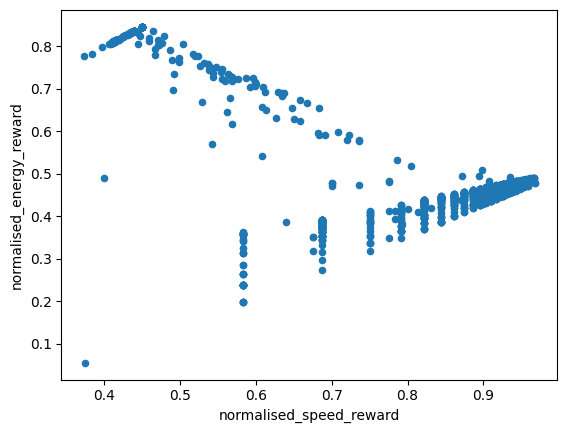

In [6]:
df_linear.plot.scatter("normalised_speed_reward","normalised_energy_reward")
df_cheb.plot.scatter("normalised_speed_reward","normalised_energy_reward")